### 공부시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수를 예측
- 데이터셋 : 임의의 생성
- 피쳐/속성 : 공부 시간
- 타겟/라벨 : 점수
- 학습 방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 <== [조건] 데이터의 분포가 선형 분포여야 함

[1] 데이터 준비

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
jumsu = range(7, 100, 7)
len(jumsu), jumsu[-1]

(14, 98)

In [34]:
hour = range(1, 29, 2)
len(hour)

14

In [35]:
list(hour)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]

In [36]:
# List => DataFrame()으로 변환

hourDF = pd.DataFrame(hour, columns = ['hour'])
hourDF.head()

,hour
0,1
1,3
2,5
3,7
4,9


In [37]:
jumsuSR = pd.Series(jumsu)
jumsuSR.head()

0     7
1    14
2    21
3    28
4    35
dtype: int64

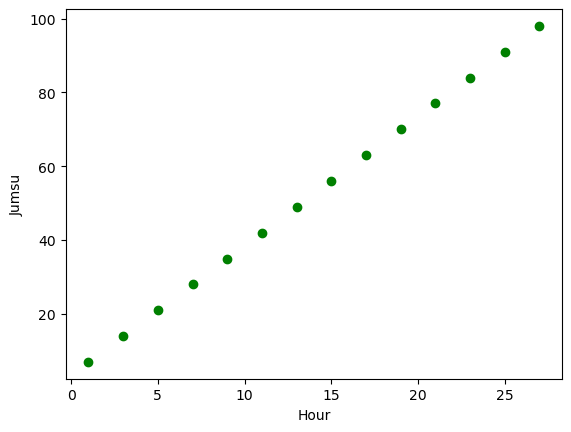

In [38]:
# 현재 데이터의 분포 확인
plt.plot(hourDF, jumsuSR, 'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

[2] 모델 생성 및 학습 진행

In [39]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

In [40]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [41]:
# 학습 진행 => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(hourDF, jumsuSR)

LinearRegression()

In [42]:
# 학습 후 모델 파라미터
print(f"기울기 : {model.coef_} 절편 : {model.intercept_}")

기울기 : [3.5] 절편 : 3.500000000000007


In [47]:
# y = ax + b
pre_jumsu = model.coef_ * hourDF + model.intercept_
pre_jumsu

,hour
0,7.0
1,14.0
2,21.0
3,28.0
4,35.0
5,42.0
6,49.0
7,56.0
8,63.0
9,70.0


In [59]:
# 실제 점수와 예측 점수의 차이 확인
pre_jumsu['hour'] - jumsuSR

0     7.105427e-15
1     5.329071e-15
2     3.552714e-15
3     3.552714e-15
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     0.000000e+00
8     0.000000e+00
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
dtype: float64

In [43]:
x = range(1, 30)
y = model.coef_[0] * x + model.intercept_

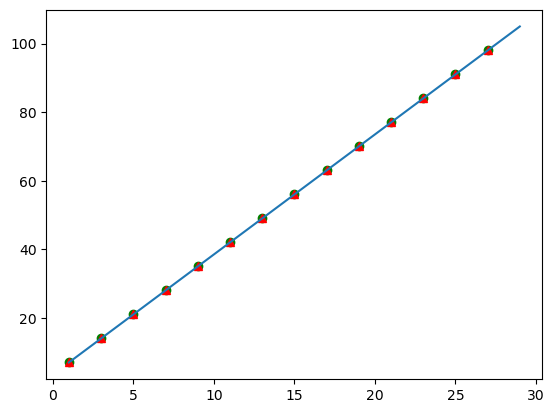

In [64]:
plt.plot(hourDF, jumsuSR, 'go')
plt.plot(hourDF, pre_jumsu, 'r^')
plt.plot(x, y)
plt.show()

[3] 모델 성능 평가

In [71]:
model.score(hourDF, jumsuSR)

1.0

In [74]:
# 오차 계산 즉, 손실/비용함수 확인
# root_mean_squared_error v.1.4 이상
import sklearn
sklearn.__version__

'1.3.0'

In [79]:
pre_y = model.predict(hourDF)
pre_y

array([ 7., 14., 21., 28., 35., 42., 49., 56., 63., 70., 77., 84., 91.,
       98.])

In [77]:
mean_squared_error(y_true = jumsuSR, y_pred = pre_jumsu)

7.437831392083826e-30

In [84]:
mse = mean_squared_error(y_true = jumsuSR, y_pred = pre_y)
rmse = mean_squared_error(jumsuSR, pre_y, squared = False)
mae = mean_absolute_error(jumsuSR, pre_y)
r2 = r2_score(jumsuSR, pre_y)

In [85]:
# 손실/비용함수 값은 0에 가까울 수록
# 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"mae : {mae}")
print(f"r2 : {r2}")

mse : 7.437831392083826e-30
rmse : 2.727238785307188e-15
mae : 1.395708945243054e-15
r2 : 1.0
